In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import utils
%load_ext autoreload

%autoreload 2

%matplotlib inline

In [79]:
gdp = pd.read_csv('../dataset/social-spending-oecd-longrun.csv')
alco = pd.read_csv('../dataset/rate-of-premature-deaths-due-to-alcohol.csv')

In [80]:
display(gdp.head())
display(alco.head())

,Entity,Code,Year,Social Expenditure %GDP - (OWID extrapolated series) (%)
0,Australia,AUS,1880,0
1,Australia,AUS,1890,0
2,Australia,AUS,1900,0
3,Australia,AUS,1910,1.12
4,Australia,AUS,1920,1.66


,Entity,Code,Year,Deaths - Alcohol use - Sex: Both - Age: Age-standardized (Rate) (Rate)
0,Afghanistan,AFG,1990,4.527867
1,Afghanistan,AFG,1991,3.969239
2,Afghanistan,AFG,1992,3.164372
3,Afghanistan,AFG,1993,2.561800
4,Afghanistan,AFG,1994,2.123057


In [81]:
gdp = gdp[gdp.Year > 1990]

In [82]:
new = utils.nearestYear(gdp,alco)
new.head()

,Entity,Code,Year,Social Expenditure %GDP - (OWID extrapolated series) (%),RoundYear
29,Australia,AUS,1995,16.871,1995.0
30,Australia,AUS,2000,18.242,2000.0
31,Australia,AUS,2005,16.681,2005.0
32,Australia,AUS,2010,16.706,2010.0
33,Australia,AUS,2013,18.109,2013.0


In [90]:
# Merge two dataframe on years it matches and country name
df = pd.merge(alco, 
              new,  
              how='inner', left_on=['Entity','Year'], right_on = ['Entity','Year'], suffixes=['_alcohol','_gdp'])
# Rename Social Expediture percentage column
df.rename(columns={'Social Expenditure %GDP - (OWID extrapolated series) (%)': 'Percent_GDP','Deaths - Alcohol use - Sex: Both - Age: Age-standardized (Rate) (Rate)':'Deaths'},inplace=True)
# Delete row with  string '..' Convert object type to float
df = df[df.Percent_GDP != '..']
df.Percent_GDP = df.Percent_GDP.astype(float)
df = df[df.Percent_GDP != 0]
df.dropna(inplace = True)
mean = df.Percent_GDP.mean()
print('the average of percentage spend by countries is {}, the shape of the dataframe is {}'.format(mean,df.shape))

# Gini index indicates if it is higher than there is higher inequality
df.head()

the average of percentage spend by countries is 20.29715471698113, the shape of the dataframe is (265, 7)


,Entity,Code_alcohol,Year,Deaths,Code_gdp,Percent_GDP,RoundYear
0,Australia,AUS,1995,25.691102,AUS,16.871,1995.0
1,Australia,AUS,2000,21.606921,AUS,18.242,2000.0
2,Australia,AUS,2005,20.413080,AUS,16.681,2005.0
3,Australia,AUS,2010,21.497468,AUS,16.706,2010.0
4,Australia,AUS,2013,21.028834,AUS,18.109,2013.0


In [91]:
df.min()

Entity          Australia
Code_alcohol          AUS
Year                 1995
Deaths           -8.42654
Code_gdp              AUS
Percent_GDP         3.071
RoundYear            1995
dtype: object

In [92]:
def rangeOfPercent(percent):
    if percent < 17.5:
        return 15
    elif percent < 22.5:
        return 20
    else:
        return 25

In [93]:
#df.drop(['70 and older (deaths)','50-69 (deaths)','15-49 (deaths)','under 5 (deaths)'],axis=1,inplace=True)
df['Groups'] = df.Percent_GDP.apply(rangeOfPercent)
df.head()

,Entity,Code_alcohol,Year,Deaths,Code_gdp,Percent_GDP,RoundYear,Groups
0,Australia,AUS,1995,25.691102,AUS,16.871,1995.0,15
1,Australia,AUS,2000,21.606921,AUS,18.242,2000.0,20
2,Australia,AUS,2005,20.413080,AUS,16.681,2005.0,15
3,Australia,AUS,2010,21.497468,AUS,16.706,2010.0,15
4,Australia,AUS,2013,21.028834,AUS,18.109,2013.0,20


In [94]:
df.Groups.value_counts()

20    96
25    92
15    77
Name: Groups, dtype: int64

In [95]:
fif = df[df['Groups'] == 15]
twenty = df[df['Groups'] == 20]
tfive = df[df['Groups'] == 25]

/Users/kaanbursa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


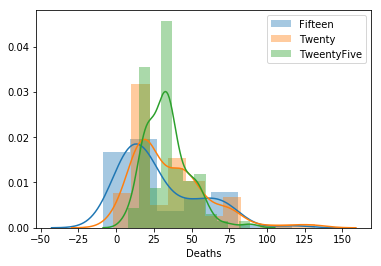

In [96]:

sns.distplot(fif['Deaths'],label='Fifteen')
sns.distplot(twenty['Deaths'],label='Twenty')
sns.distplot(tfive['Deaths'],label='TweentyFive')
plt.legend()
#sns.distplot(thirty['Deaths'])